## Sentiment Classification on Movie Reviews using LSTMs and Keras
In this notebook, we have experimented with Long Short Term Memory (LSTM) Recurrent Neural Networks (RNNs) to perform sentiment classification on movie reviews, using Keras API (https://keras.io/)
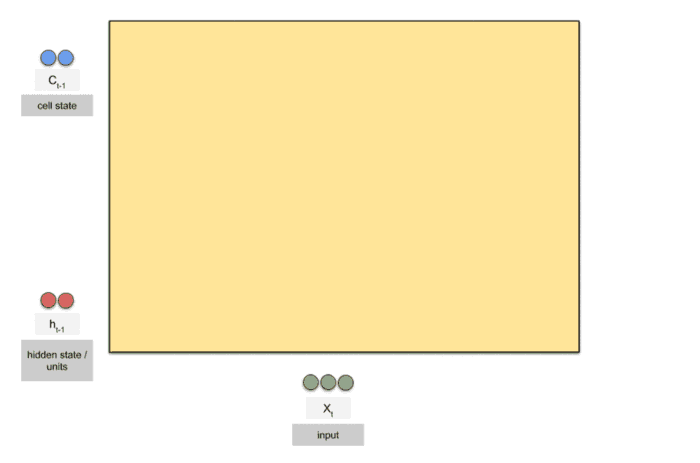


### Loading the libraries

In [48]:
# !pip install wordcloud;
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.python.keras.layers import SpatialDropout1D
from collections import Counter
from tensorflow.keras import backend as K
from nltk.stem import PorterStemmer


### Loading the data


In [33]:
df = pd.read_csv(r"MoviesDataset.csv")
df.head(10)


,Summary,Sentiment
0,rock destined st century new conan going make ...,1
1,gorgeously elaborate continuation lord ring tr...,1
2,effective tepid biopic,1
3,sometimes like go movie fun wasabi good place ...,1
4,emerges something rare issue movie honest keen...,1
5,film provides great insight neurotic mindset c...,1
6,offer rare combination entertainment education,1
7,perhaps picture ever made literally showed roa...,1
8,steer turn snappy screenplay curl edge clever ...,1
9,take care cat offer refreshingly different sli...,1


### Creating sentiment histogram

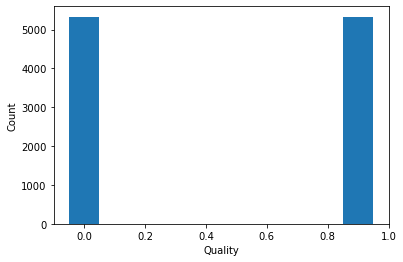

In [34]:
#review reviews count histogram
def plot_sentiment_histogram(sentiment):
    unique_vals = df['Sentiment'].sort_values().unique()
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.hist(sentiment.values, align='left')
    plt.show()
    
plot_sentiment_histogram(df['Sentiment'])

### Create review length histogram

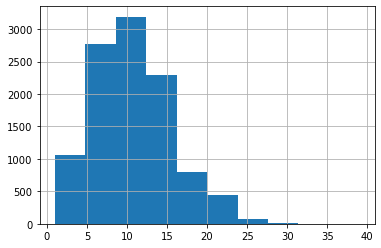

count    10662.000000
mean        10.693022
std          4.897278
min          1.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         39.000000
dtype: float64


In [35]:
# get the length of every review in the dataset
reviews_len = [len(x.split()) for x in X]
# create review length histogram
pd.Series(reviews_len).hist()
# plot histogram
plt.show()
pd.Series(reviews_len).describe()
print(pd.Series(reviews_len).describe())

### Get min and max length of reviews

In [36]:
X = df['Summary'].values
Y = df['Sentiment'].values
# get the max length of a review (number of words in this sentence)
max_length = max([len(s.split()) for s in X])
# get the min length of a review (number of words in this sentence)
min_length = min([len(s.split()) for s in X])
print(max_length)
print(min_length)

39
1


### Create a dictionary of words

In [50]:
ps = PorterStemmer()
reviews = df['Summary'].values
#create a sequence of words
all_text = ' '.join([c for c in reviews])
reviews_split = all_text.split('\n')
# put all reviews in one string
all_text2 = ' '.join(reviews_split)

print('Number of words :', len(all_text2))
# create a list of words
words = all_text2.split()  
# Count all the words using Counter Method
# Build a dictionary that maps words to integers
count_words = Counter(words)

total_words = len(words)
print(total_words)

# check for stemming
rootWord = []
for word in unique:
    if(ps.stem(word)==word):
        rootWord.append(ps.stem(word))

print(len(rootWord))
sorted_words = count_words.most_common(9000)

Number of words : 819577
114009
6972


### Get unique words

In [38]:
unique = []
for word in words:
    if word not in unique:
        unique.append(word)

#sort
unique.sort()
len(unique)

16319

### Create wordcloud illustration
For sentiment analysis, it is always useful to get the most frequent words of the dataset. For this purpose, we will create a wordcloud to get the top 500 most frequent words. A worldcloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

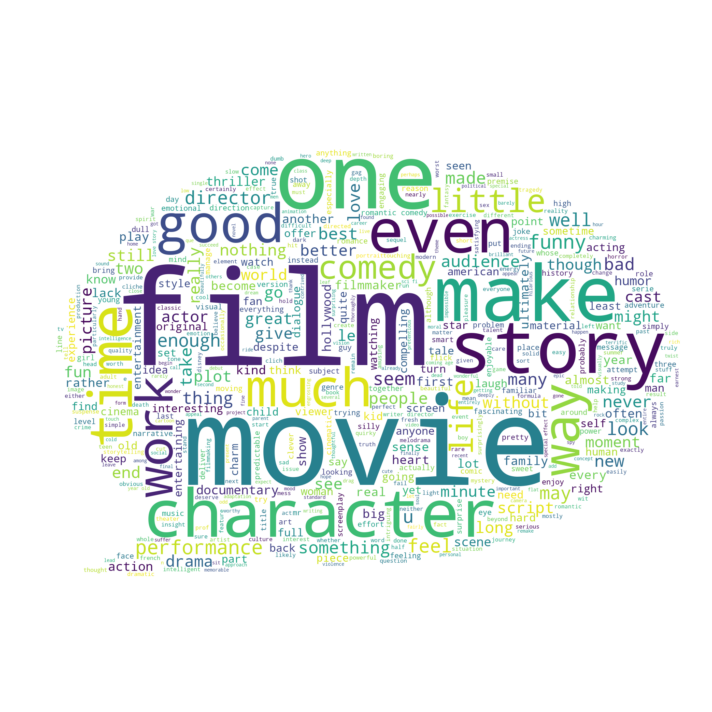

In [39]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('comment.png'))
# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("br")

# setup, generate and save the word cloud image to a file
wc = WordCloud(
               random_state=1,            
               background_color="white",
               width=500, height=400,
               mask = mask,
               max_words=wordcount,
               stopwords=stopwords)
wc.generate(all_text2)
wc.to_file("WordCloud.png")

# show the wordcloud as output
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()  


In [40]:
total_words = len(words)
sorted_words = count_words.most_common(100)
print(sorted_words)


[('film', 1780), ('movie', 1602), ('one', 794), ('like', 740), ('story', 540), ('make', 532), ('character', 494), ('time', 479), ('good', 424), ('comedy', 415), ('much', 388), ('even', 386), ('way', 338), ('well', 334), ('director', 331), ('work', 330), ('performance', 326), ('life', 315), ('little', 307), ('funny', 294), ('feel', 285), ('get', 274), ('enough', 268), ('never', 263), ('u', 254), ('bad', 248), ('may', 245), ('love', 244), ('best', 243), ('year', 241), ('thing', 241), ('would', 232), ('look', 232), ('made', 222), ('take', 219), ('come', 215), ('new', 211), ('drama', 205), ('action', 204), ('something', 202), ('could', 200), ('audience', 199), ('really', 197), ('see', 196), ('two', 195), ('minute', 192), ('plot', 191), ('go', 185), ('long', 184), ('still', 184), ('many', 183), ('old', 180), ('every', 179), ('people', 176), ('big', 176), ('nothing', 175), ('first', 175), ('better', 173), ('give', 172), ('end', 172), ('fun', 169), ('without', 167), ('great', 166), ('picture'

### Split dataset in train and test sets
<p style='text-align: justify;'> We have used the <b> train_test_split</b> method of sklearn library to split the dataset. 70% of the data will be used for training the model, while 30% will be used for testing the model that is built out of it. Note that the parameter "random state"  controls the shuffling applied to the data before applying the split. Setting random_state a fixed value (42 in our case) will guarantee that the same sequence of random numbers are generated each time we run the code.</p>

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Tokenizing sentences, creating and padding sequences
* `Tokenize`: divides a sentence into a list of words, to implement this we are using the TensorFlow (Keras) **Tokenizer**   class and we keep only the 10.000 most frequent words.
* `Create Vocabulary`: creates the vocabulary index based on word frequency. It is a word to index dictionary, so every word gets a unique integer value, lower integer means more frequent word. This was implemented with the **fit_on_texts** method of keras.
* `Words to integers`: takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. This was implemented with the **text_to_sequences** method of Keras.
* `Padding sequences`: Input data for our model needs to be of the same length, which is not happening in our dataset. For this reason we need to use padding, a method used to ensure that all sequence in dataset have the same length. This was implemented with the **pad-sequences** method of keras.

In [42]:
X = df['Summary'].values
Y = df['Sentiment'].values

max_seq_length = 30
# tokenize sentences, keep 10000 most frequent words
tokenizer = Tokenizer(num_words=10000)
# Create the vocabulary index based on word frequency
tokenizer.fit_on_texts(X)
# number of the unique words based on the number of elements in this dictionary
vocab_size = len(tokenizer.word_index) + 1
print('Found %s unique tokens.' % vocab_size)

# assign an integer to each word and create integer sequences
x_train_tokens = tokenizer.texts_to_sequences(X_train)
x_test_tokens = tokenizer.texts_to_sequences(X_test)

# pad all our reviews to a specific length
X_train = pad_sequences(x_train_tokens, maxlen=max_seq_length)
X_test = pad_sequences(x_test_tokens, maxlen=max_seq_length)


Found 16320 unique tokens.


### Calculating precision, recall and f1 score
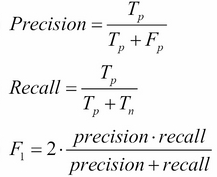

In [43]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Building the network

1. `Embedding layer` <p style='text-align: justify;'>is best understood as a dictionary mapping integer indices to dense vectors. It takes as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively a dictionary lookup. The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of integers. All sequences in a batch must have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated. We will restrict the movie reviews to the top 10,000 most common words (like we did previously), and cut the reviews after only 30 words. Our network will simply learn 16-dimensional embeddings for each of the 10,000 words, and turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor).  </p>

2. `Dropout layer` <p style='text-align: justify;'> LSTM generally suffers from overfitting the data. Dropout is a technique of countering overfitting by improving the ability of model to generalise better. This is done by setting random activations of hidden layers to zero. Through this randomness, the final classification layer always receives a different transformed input for a corresponding output, thus preventing overfitting and improving model's ability to generalize on unseen data.
</p>

3. `LSTM layer` <p style='text-align: justify;'> with dropout and recurrent dropout to prevent overfitting </p>

4. `Dense layer` <p style='text-align: justify;'> implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (optional - not used here). The model trains a single layer on top for classification. We choose Sigmoid as activation function because the output is binary.
The optimizer is Adam and the loss function is Binary Crossentropy because the output is binary.
</p>

   

In [44]:
# initialize parameters for Embedding Layer
MAX_SEQUENCE_LENGTH = 30
EMBEDDING_DIM = 16

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', f1_m, precision_m, recall_m])
model.summary()

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=True, batch_size=32)
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 16)            261120    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 30, 16)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                13400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 274,571
Trainable params: 274,571
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
234/234 [==============================] - 8s 33ms/step - loss: 0.6910 - accuracy: 0.5269 - f1_m: 0.4562

### Precision, recall, f1-score and accuracy

In [45]:
print("F1-score")
print(f1_score)
print("Precision")
print(precision)
print("Recall")
print(recall)

F1-score
0.7428044676780701
Precision
0.7608931660652161
Recall
0.7382169365882874


### Test model

In [46]:
# sample review 1
test_word = "This is a bad bad movie"
# transform text to a sequence of integers
tw = tokenizer.texts_to_sequences([test_word])
# pad review to a specific length
tw = pad_sequences(tw, maxlen=30)
print(model.predict(tw))
# get prediction (0 or 1)
prediction = 1 if model.predict(tw).item() > 0.5 else 0
print(prediction)

# sample review 2
test_word = "This film is terrible"
# transform text to a sequence of integers
tw1 = tokenizer.texts_to_sequences([test_word])
# pad review to a specific length
tw1 = pad_sequences(tw1, maxlen=30)
print(model.predict(tw1))
# get prediction (0 or 1)
prediction1 = 1 if model.predict(tw1).item() > 0.5 else 0
print(prediction1)

# sample review 3
test_word = "This film is great"
# transform text to a sequence of integers
tw2 = tokenizer.texts_to_sequences([test_word])
# pad review to a specific length
tw2 = pad_sequences(tw2, maxlen=30)
print(model.predict(tw2))
# get prediction (0 or 1)
prediction2 = 1 if model.predict(tw2).item() > 0.5 else 0
print(prediction2)

# sample review 4
test_word = "This film is awesome"
# transform text to a sequence of integers
tw3 = tokenizer.texts_to_sequences([test_word])
# pad review to a specific length
tw3 = pad_sequences(tw3, maxlen=30)
print(model.predict(tw3))
# get prediction (0 or 1)
prediction3 = 1 if model.predict(tw3).item() > 0.5 else 0
print(prediction3)

[[0.03074026]]
0
[[0.42448157]]
0
[[0.5654557]]
1
[[0.67178774]]
1
